In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [24]:
merged_df = pd.read_csv('../Data/merged.csv')
merged_df['Date'] = pd.to_datetime(merged_df['Date'], format='mixed', dayfirst=True, errors='coerce')

In [25]:
lag_cols = [f"Close_lag{k}" for k in range(1, 11)]
X = merged_df[lag_cols]
y = merged_df["Close"]   

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,  
    shuffle=True
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:,.4f}")
print(f"MAE : {mae:,.4f}")
print(f"R²  : {r2:,.4f}")

coef_table = pd.Series(model.coef_, index=lag_cols)
print("\nCoefficients:")
print(coef_table.round(5))

RMSE: 7.1375
MAE : 2.6665
R²  : 0.9995

Coefficients:
Close_lag1     0.98535
Close_lag2    -0.01875
Close_lag3    -0.00004
Close_lag4     0.03985
Close_lag5    -0.02698
Close_lag6    -0.04326
Close_lag7     0.07091
Close_lag8    -0.07114
Close_lag9     0.08469
Close_lag10   -0.02102
dtype: float64


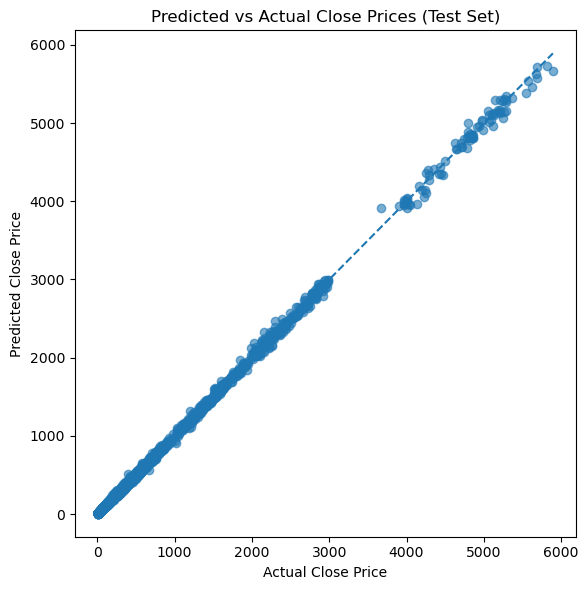

In [26]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], linestyle="--")  # 45° reference line
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Predicted vs Actual Close Prices (Test Set)")
plt.tight_layout()
plt.show()

In [27]:
cutoff_date = merged_df['Date'].quantile(0.8)

train = merged_df[merged_df['Date'] <= cutoff_date]
test  = merged_df[merged_df['Date']  > cutoff_date]

X_train, y_train = train[lag_cols], train['Close']
X_test,  y_test  = test[lag_cols],  test['Close']

model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)

print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE :", mean_absolute_error(y_test, y_pred))
print("R²  :", r2_score(y_test, y_pred))

coef_table = pd.Series(model.coef_, index=lag_cols)
print("\nCoefficients:")
print(coef_table.round(5))

RMSE: 9.109051786052683
MAE : 3.4803572588964324
R²  : 0.9991260327142055

Coefficients:
Close_lag1     0.99845
Close_lag2    -0.00633
Close_lag3    -0.03157
Close_lag4     0.02605
Close_lag5     0.02432
Close_lag6    -0.03140
Close_lag7     0.01576
Close_lag8    -0.03484
Close_lag9     0.00811
Close_lag10    0.03191
dtype: float64


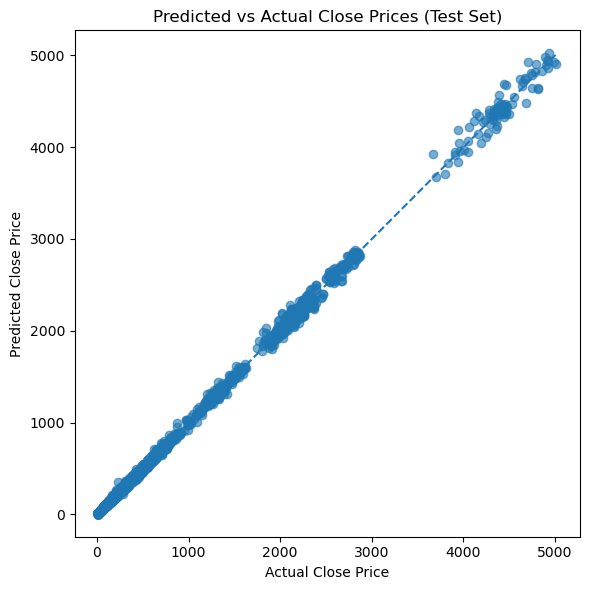

In [28]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], linestyle="--")  # 45° reference line
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Predicted vs Actual Close Prices (Test Set)")
plt.tight_layout()
plt.show()

In [29]:
# Try using AAPL only
aapl = merged_df[merged_df['Symbol'] == 'AAPL'].copy()

cutoff_date = aapl['Date'].quantile(0.8)

train = aapl[aapl['Date'] <= cutoff_date]
test  = aapl[aapl['Date']  > cutoff_date]

X_train, y_train = train[lag_cols], train['Close']
X_test,  y_test  = test[lag_cols],  test['Close']

model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)

print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE :", mean_absolute_error(y_test, y_pred))
print("R²  :", r2_score(y_test, y_pred))

coef_table = pd.Series(model.coef_, index=lag_cols)
print("\nCoefficients:")
print(coef_table.round(5))

RMSE: 3.736251010131541
MAE : 3.0303437505808555
R²  : 0.9210475899913592

Coefficients:
Close_lag1     1.01319
Close_lag2    -0.04538
Close_lag3    -0.03203
Close_lag4     0.02161
Close_lag5    -0.00466
Close_lag6     0.05312
Close_lag7     0.01256
Close_lag8    -0.06529
Close_lag9    -0.03638
Close_lag10    0.07719
dtype: float64


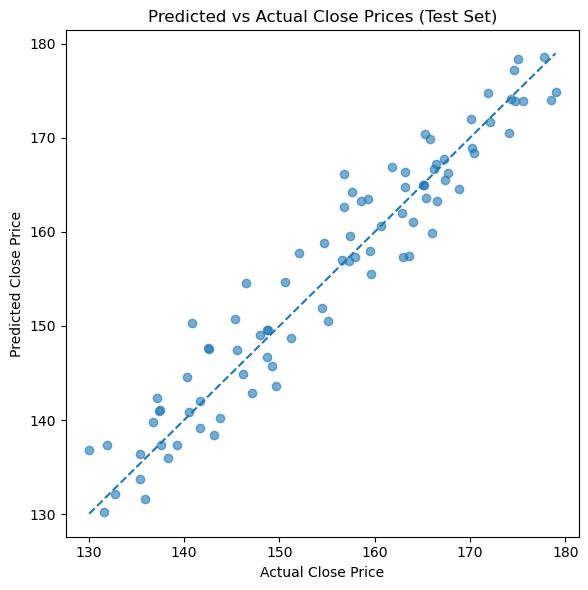

In [30]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], linestyle="--")  # 45° reference line
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Predicted vs Actual Close Prices (Test Set)")
plt.tight_layout()
plt.show()